##Extracting live stock market data from yahooo finance. Finding similarities amongst various companies using their stock market prices and then cluster them into different clusters using k-means algorithm.

## Extraction

In [0]:
from pandas_datareader import data 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import datetime
import warnings 
warnings.simplefilter("ignore")

In [0]:
companies_dict = {
    'Amazon': 'AMZN',
    'Apple': 'AAPL',
    'Walgreen': 'WBA',
    'Northrop Grumman': 'NOC',
    'Boeing': 'BA',
    'Lockhead Martin': 'LMT',
    'McDonalds': 'MCD',
    'Intel': 'INTC',
    'IBM': 'IBM',
    'Texas Instruments': 'TXN',
    'MasterCard': 'MA',
    'Microsoft': 'MSFT',
    'General Electrics': 'GE',
    'American Express': 'AXP',
    'Pepsi': 'PEP',
    'Coca-cola': 'KO',
    'Johnson & Johnson': 'JNJ',
    'Honda': 'HMC',
    'Exxon': 'XOM',
    'Chevron': 'CVX',
    'Valero energy': 'VLO',
    'Ford': 'F',
    'Bank of America': 'BAC',
    "Google": 'GOOGL'
}

In [0]:
data_source = 'yahoo'#yahoofinance
start_date = '2015-04-25'
end_date = '2021-04-25'
df = data.DataReader(list(companies_dict.values()), data_source, start_date, end_date)

In [0]:
# displaying
df.sample(5)

Out[241]:

Attributes 
 Adj Close 
 Close 
 ... 
 Open 
 Volume 
 
 
 Symbols 
 AMZN 
 AAPL 
 WBA 
 NOC 
 BA 
 LMT 
 MCD 
 INTC 
 IBM 
 TXN 
 MA 
 MSFT 
 GE 
 AXP 
 PEP 
 KO 
 JNJ 
 HMC 
 XOM 
 CVX 
 VLO 
 F 
 BAC 
 GOOGL 
 AMZN 
 AAPL 
 WBA 
 NOC 
 BA 
 LMT 
 MCD 
 INTC 
 IBM 
 TXN 
 MA 
 MSFT 
 GE 
 AXP 
 PEP 
 KO 
 ... 
 IBM 
 TXN 
 MA 
 MSFT 
 GE 
 AXP 
 PEP 
 KO 
 JNJ 
 HMC 
 XOM 
 CVX 
 VLO 
 F 
 BAC 
 GOOGL 
 AMZN 
 AAPL 
 WBA 
 NOC 
 BA 
 LMT 
 MCD 
 INTC 
 IBM 
 TXN 
 MA 
 MSFT 
 GE 
 AXP 
 PEP 
 KO 
 JNJ 
 HMC 
 XOM 
 CVX 
 VLO 
 F 
 BAC 
 GOOGL 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2018-08-03 
 1823.290039 
 50.275055 
 60.577053 
 282.695343 
 335.364655 
 296.277435 
 145.285065 
 46.102360 
 127.667976 
 103.920670 
 198.063034 
 104.014175 
 12.366762 
 96.358597 
 106.360161 
 42.310894 
 121.799355 
 30.660000 
 67.306442 
 107.799606 
 99.412758 
 9.094123 
 29.423491 
 1238.160034 
 1823.290039 
 51.997501 
 67.220001 
 297.250000 
 348.440002 
 320.549988 
 156.210007 
 49.630001 
 147.699997 
 112.839996 
 201.199997 
 108.040001 
 12.634615 
 100.790001 
 116.300003 
 46.619999 
 ... 
 143.240005 
 112.330002 
 202.009995 
 107.800003 
 12.644231 
 99.959999 
 114.769997 
 46.230000 
 131.179993 
 30.190001 
 79.970001 
 124.150002 
 115.440002 
 9.93 
 31.18 
 1245.180054 
 3460500.0 
 133789600.0 
 4307300.0 
 703900.0 
 2285200.0 
 945400.0 
 3673100.0 
 22008200.0 
 8053600.0 
 3337900.0 
 2722800.0 
 18659600.0 
 36654904.0 
 1830400.0 
 3934500.0 
 11462800.0 
 6498700.0 
 530100.0 
 7811100.0 
 5299400.0 
 2583000.0 
 25925100.0 
 50153800.0 
 1063200.0 
 
 
 2017-11-10 
 1125.349976 
 41.888023 
 63.212784 
 280.661346 
 248.588211 
 282.447876 
 151.173630 
 41.813595 
 126.271217 
 87.768829 
 146.583557 
 79.620590 
 18.827694 
 88.443146 
 100.725517 
 41.161629 
 126.288513 
 32.930000 
 68.209991 
 99.027237 
 68.411316 
 10.331271 
 24.457464 
 1044.150024 
 1125.349976 
 43.667500 
 70.989998 
 298.130005 
 260.850006 
 311.170013 
 165.589996 
 45.580002 
 149.160004 
 96.940002 
 149.539993 
 83.870003 
 19.701923 
 93.519997 
 112.750000 
 46.540001 
 ... 
 150.649994 
 96.669998 
 149.000000 
 83.790001 
 19.211538 
 93.790001 
 111.440002 
 46.200001 
 140.130005 
 33.000000 
 83.010002 
 116.709999 
 80.959999 
 12.00 
 26.59 
 1043.869995 
 2179900.0 
 100582000.0 
 12381000.0 
 391900.0 
 1740600.0 
 630800.0 
 4226800.0 
 24095400.0 
 4307300.0 
 3416700.0 
 1795900.0 
 19397800.0 
 104762216.0 
 2714400.0 
 3699500.0 
 8022900.0 
 4240800.0 
 1053600.0 
 8693700.0 
 5156900.0 
 2473900.0 
 35298400.0 
 61105300.0 
 972100.0 
 
 
 2020-03-20 
 1846.089966 
 56.772747 
 44.042339 
 277.806671 
 95.010002 
 281.634369 
 144.094788 
 44.393742 
 89.376808 
 93.874908 
 209.803741 
 135.655029 
 6.483804 
 72.409935 
 100.132004 
 36.772041 
 116.009514 
 20.740000 
 29.806170 
 55.391602 
 35.730988 
 4.330000 
 19.102791 
 1068.209961 
 1846.089966 
 57.310001 
 46.419998 
 284.019989 
 95.010002 
 291.220001 
 148.490005 
 45.830002 
 95.389999 
 97.599998 
 211.419998 
 137.350006 
 6.520000 
 74.120003 
 103.930000 
 38.299999 
 ... 
 100.919998 
 104.500000 
 236.020004 
 146.000000 
 7.010000 
 78.980003 
 118.239998 
 41.950001 
 126.830002 
 21.520000 
 34.840000 
 59.529999 
 38.490002 
 4.54 
 21.76 
 1130.900024 
 9817900.0 
 401693200.0 
 11030000.0 
 1768500.0 
 41370700.0 
 3040100.0 
 12000000.0 
 52344000.0 
 10546500.0 
 10253200.0 
 10518600.0 
 84866200.0 
 126128700.0 
 12208600.0 
 13093200.0 
 51513500.0 
 19785100.0 
 1582800.0 
 76534600.0 
 26960400.0 
 9225000.0 
 129378600.0 
 150910400.0 
 4143900.0 
 
 
 2015-12-29 
 693.969971 
 25.105902 
 74.421913 
 175.372971 
 132.148453 
 190.883514 
 104.285530 
 30.606813 
 109.730957 
 49.034424 
 96.248962 
 51.366478 
 27.147667 
 64.411667 
 86.238693 
 36.521446 
 89.777771 
 

## EDA

In [0]:
pd.set_option('display.max_rows', None)

In [0]:
# checking for null values
df.isnull().sum()

Out[243]: Attributes Symbols
Adj Close AMZN 0
 AAPL 0
 WBA 0
 NOC 0
 BA 0
 LMT 0
 MCD 0
 INTC 0
 IBM 0
 TXN 0
 MA 0
 MSFT 0
 GE 0
 AXP 0
 PEP 0
 KO 0
 JNJ 0
 HMC 0
 XOM 0
 CVX 0
 VLO 0
 F 0
 BAC 0
 GOOGL 0
Close AMZN 0
 AAPL 0
 WBA 0
 NOC 0
 BA 0
 LMT 0
 MCD 0
 INTC 0
 IBM 0
 TXN 0
 MA 0
 MSFT 0
 GE 0
 AXP 0
 PEP 0
 KO 0
 JNJ 0
 HMC 0
 XOM 0
 CVX 0
 VLO 0
 F 0
 BAC 0
 GOOGL 0
High AMZN 0
 AAPL 0
 WBA 0
 NOC 0
 BA 0
 LMT 0
 MCD 0
 INTC 0
 IBM 0
 TXN 0
 MA 0
 MSFT 0
 GE 0
 AXP 0
 PEP 0
 KO 0
 JNJ 0
 HMC 0
 XOM 0
 CVX 0
 VLO 0
 F 0
 BAC 0
 GOOGL 0
Low AMZN 0
 AAPL 0
 WBA 0
 NOC 0
 BA 0
 LMT 0
 MCD 0
 INTC 0
 IBM 0
 TXN 0
 MA 0
 MSFT 0
 GE 0
 AXP 0
 PEP 0
 KO 0
 JNJ 0
 HMC 0
 XOM 0
 CVX 0
 VLO 0
 F 0
 BAC 0
 GOOGL 0
Open AMZN 0
 AAPL 0
 WBA 0
 NOC 0
 BA 0
 LMT 0
 MCD 0
 INTC 0
 IBM 0
 TXN 0
 MA 0
 MSFT 0
 GE 0
 AXP 0
 PEP 0
 KO 0
 JNJ 0
 HMC 0
 XOM 0
 CVX 0
 VLO 0
 F 0
 BAC 0
 GOOGL 0
Volume AMZN 0
 AAPL 0
 WBA 0
 NOC 0
 BA 0
 LMT 0
 MCD 0
 INTC 0
 IBM 0
 TXN 0
 MA 0
 MSFT 0
 GE 0
 AXP 0
 PEP 0
 KO 0
 JNJ 0
 HMC 0
 XOM 0
 CVX 0
 VLO 0
 F 0
 BAC 0
 GOOGL 0
dtype: int64

In [0]:
# stock_open is numpy array of transpose of df['Open']
# stock_close is numpy array of transpose of df['Close']
stock_open = np.array(df['Open']).T
stock_close = np.array(df['Close']).T
stock_open

Out[244]: array([[ 443.85998535, 438.51000977, 426.75 , ..., 3316. ,
 3371.67993164, 3319.10009766],
 [ 33.07749939, 33.61500168, 32.54000092, ..., 132.36000061,
 133.03999329, 132.16000366],
 [ 86.69000244, 85.83999634, 85.33999634, ..., 53.38999939,
 53.97999954, 52.88000107],
 ...,
 [ 15.81999969, 15.93000031, 15.85999966, ..., 11.35999966,
 12.06000042, 11.97000027],
 [ 15.63000011, 15.57999992, 15.60000038, ..., 37.75 ,
 38.75 , 38.31999969],
 [ 572.77001953, 564.32000732, 560.51000977, ..., 2272.05004883,
 2275.39990234, 2267. ]])

In [0]:
# movements is the difference of opening and closing prices of stocks on a particular day.
#Positive means stock prices value increased on that day and vice versa
movements = stock_close - stock_open

In [0]:
movements[:5]

Out[246]: array([[ -5.29998779, -9.20001221, 2.61999512, ..., 46.02001953,
 -62.63989258, 21.77978516],
 [ 0.08499908, -0.97500229, -0.38000107, ..., 1.13999939,
 -1.09999084, 2.16000366],
 [ -0.56999969, 0.24000549, -0.76999664, ..., 0.65999985,
 -1.39999771, 0.13999939],
 [ -1.91999817, 0.5 , -2.91000366, ..., 0.3999939 ,
 -0.70001221, -0.91998291],
 [ -0.78999329, -0.38999939, -0.92001343, ..., 3.69999695,
 -1.63000488, 4.49000549]])

In [0]:
# sum of differences of closing and opening prices of all days.
sum_of_movements = np.sum(movements, 1)
sum_of_movements[:5]

Out[247]: array([-880.94256592, 39.72986412, -37.02000427, -17.13011169,
 -158.84043121])

In [0]:
for i in range(len(companies_dict)):
  print("Company: {}, Change: {}".format(df['High'].columns[i], sum_of_movements[i]))

Company: AMZN, Change: -880.9425659179688
Company: AAPL, Change: 39.7298641204834
Company: WBA, Change: -37.02000427246094
Company: NOC, Change: -17.130111694335938
Company: BA, Change: -158.8404312133789
Company: LMT, Change: -73.44935607910156
Company: MCD, Change: 40.990325927734375
Company: INTC, Change: 39.999990463256836
Company: IBM, Change: -18.239852905273438
Company: TXN, Change: 59.72992706298828
Company: MA, Change: 11.320472717285156
Company: MSFT, Change: 67.82991409301758
Company: GE, Change: -8.916905879974365
Company: AXP, Change: 7.160240173339844
Company: PEP, Change: 44.07012939453125
Company: KO, Change: 3.5599632263183594
Company: JNJ, Change: 17.449928283691406
Company: HMC, Change: -17.800004959106445
Company: XOM, Change: -29.130069732666016
Company: CVX, Change: -39.709983825683594
Company: VLO, Change: -39.339927673339844
Company: F, Change: -15.490018844604492
Company: BAC, Change: 2.929995536804199
Company: GOOGL, Change: 749.6600952148438

Out[249]:

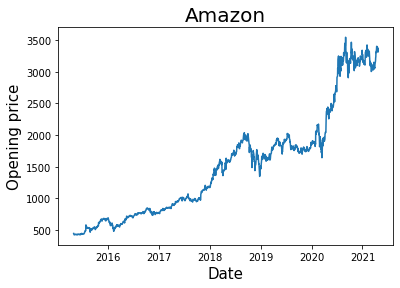

[<matplotlib.lines.Line2D at 0x7f1810f90eb0>]

In [0]:
# plotting
# plt.figure(figsize = (10,10))
# plt.subplot(1,2,1)

plt.title("Amazon", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Opening price", fontsize=15)
plt.plot(df['Open']['AMZN'])

Out[250]:

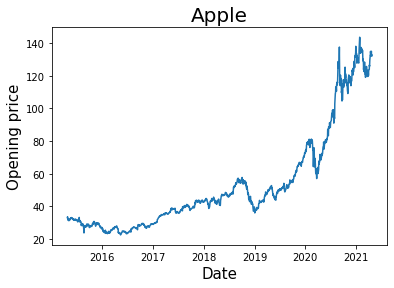

[<matplotlib.lines.Line2D at 0x7f1810d8f100>]

In [0]:
plt.title("Apple", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Opening price", fontsize=15)
plt.plot(df['Open']['AAPL'])

Out[251]:

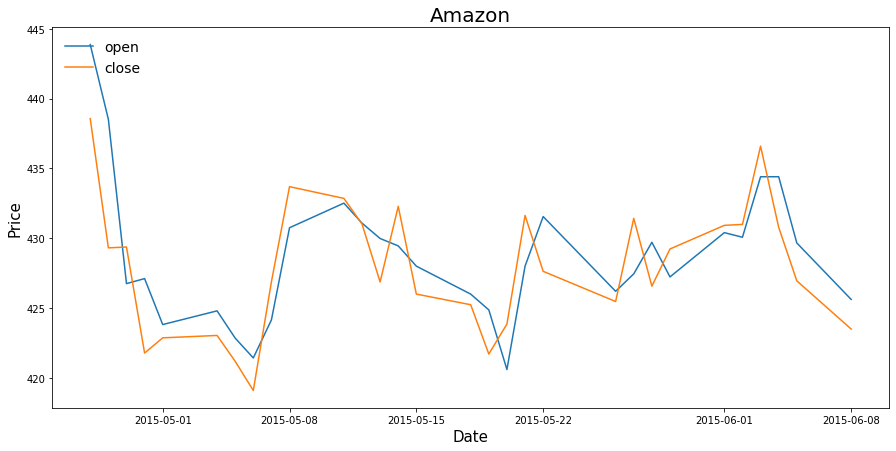

<matplotlib.legend.Legend at 0x7f1810092ee0>

In [0]:
# plotting opening price and closing price for first 30 days
plt.figure(figsize=(15,7))
plt.title("Amazon", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.plot(df.iloc[0:30]['Open']['AMZN'], label='open')
plt.plot(df.iloc[0:30]['Close']['AMZN'], label='close')
plt.legend(loc='upper left', frameon=False, framealpha=1, prop={'size':14})

Out[252]:

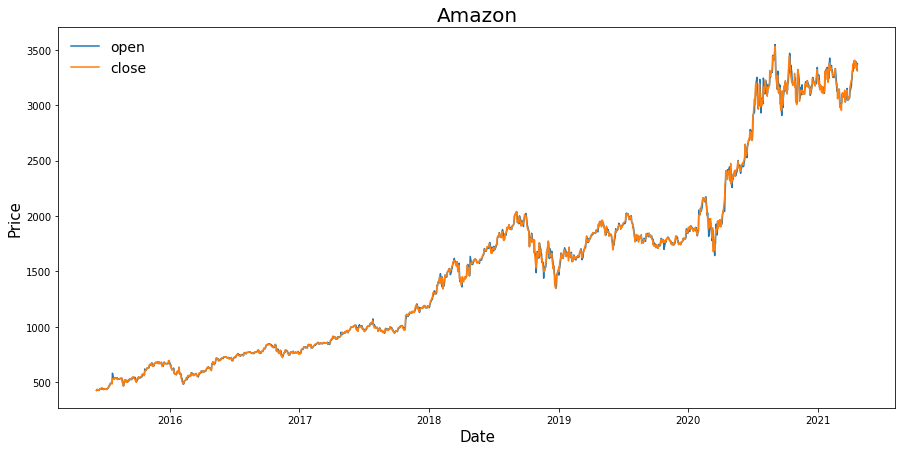

<matplotlib.legend.Legend at 0x7f181071de80>

In [0]:
# plotting opening price and closing price for last 30 days
plt.figure(figsize=(15,7))
plt.title("Amazon", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.plot(df.iloc[30:-1]['Open']['AMZN'], label='open')
plt.plot(df.iloc[30:-1]['Close']['AMZN'], label='close')
plt.legend(loc='upper left', frameon=False, framealpha=1, prop={'size':14})

there is an overall increase in open and close prices over 30 days time period which shows the company in a positive deirection

Out[253]:

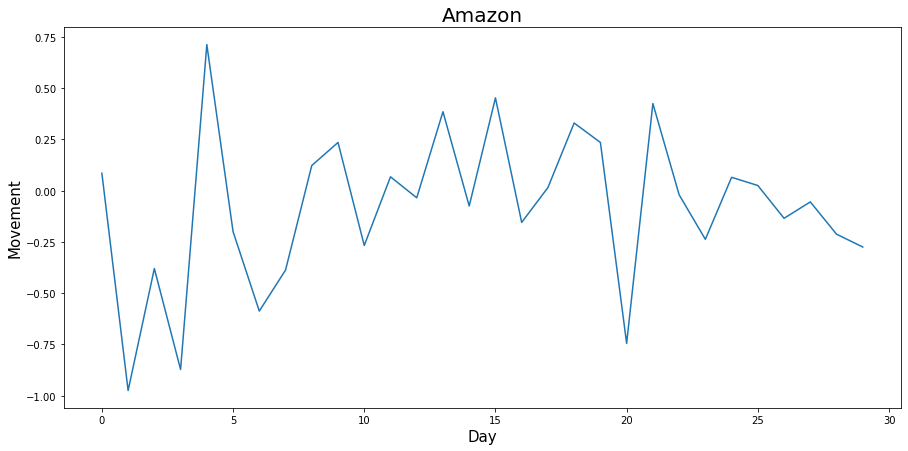

[<matplotlib.lines.Line2D at 0x7f1810800130>]

In [0]:
# plotting movement which is the difference between the opening and closing price for first 30 days
plt.figure(figsize=(15,7))
plt.title("Amazon", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Movement", fontsize=15)
plt.plot(movements[1][0:30])

A positive movement is desirable which suggests that the price has increased during the day.

Out[254]:

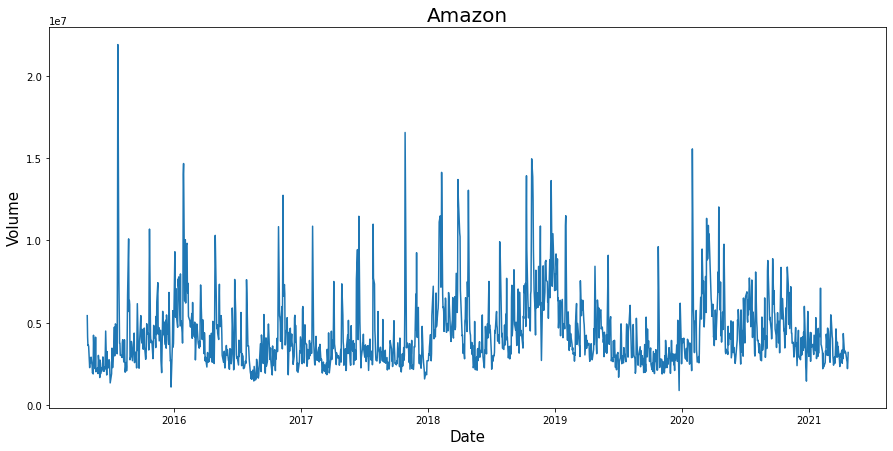

[<matplotlib.lines.Line2D at 0x7f18107cd130>]

In [0]:
# volume of stocks traded
plt.figure(figsize=(15,7))
plt.title("Amazon", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Volume", fontsize=15)
plt.plot(df['Volume']['AMZN'], label='Volume')

The peak suggests that there are high volumes of stocks traded on certain days. This may be due to several limitations which may affect the image of the company positively or negatively.

Normalizing data
 
As there is significant difference in rate of change of units in stock prices of companies, inorder to have consistency in the data for further analysis.

Out[255]:

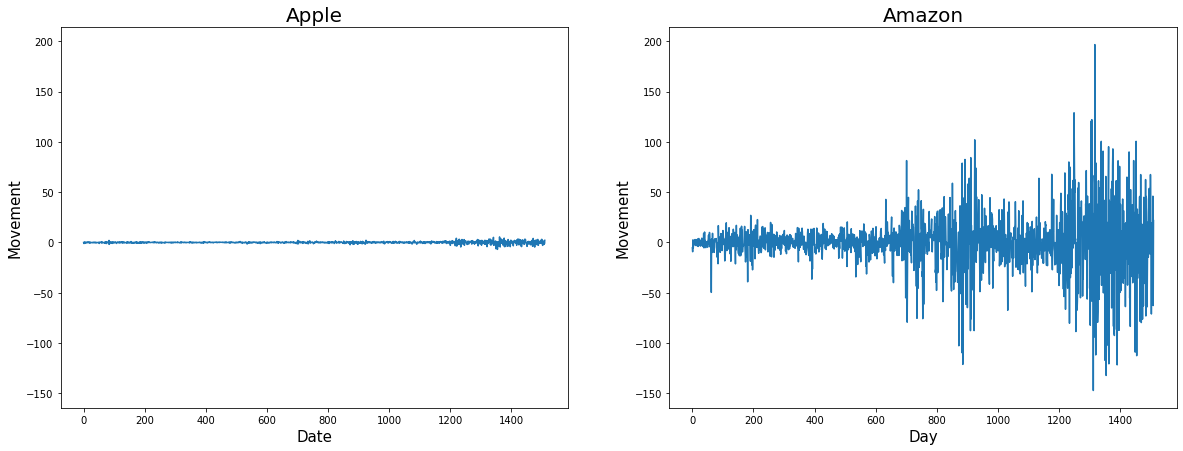

[<matplotlib.lines.Line2D at 0x7f1810b6c130>]

In [0]:
# why normalizing is imp can be shown from this two plots 
plt.figure(figsize=(20,7))
ax1 = plt.subplot(1,2,1)

plt.title("Apple", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Movement", fontsize=15)
plt.plot(movements[1])

plt.subplot(1,2,2, sharey=ax1)
plt.title("Amazon", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Movement", fontsize=15)
plt.plot(movements[0])

In [0]:
# normalising the data 
from sklearn.preprocessing import Normalizer
normalizer = Normalizer() 
norm_movements = normalizer.fit_transform(movements)

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # transform data
# scaled = scaler.fit_transform(movements)
# print(scaled)

Out[257]:

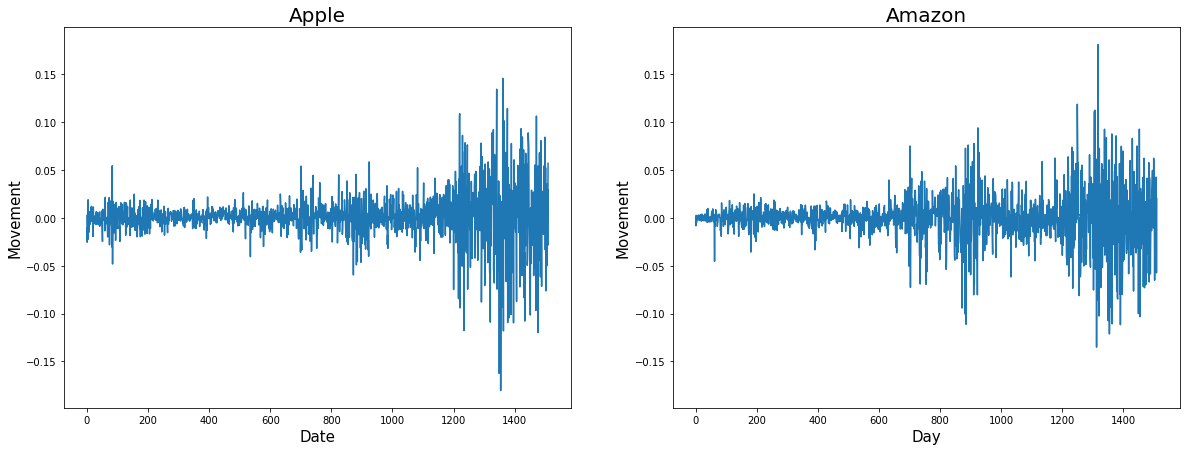

[<matplotlib.lines.Line2D at 0x7f1810245bb0>]

In [0]:
# visualizing normalized data
plt.figure(figsize=(20,7))
ax1 = plt.subplot(1,2,1)

plt.title("Apple", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Movement", fontsize=15)
plt.plot(norm_movements[1])

plt.subplot(1,2,2, sharey=ax1)
plt.title("Amazon", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Day", fontsize=15)
plt.ylabel("Movement", fontsize=15)
plt.plot(norm_movements[0])

##K-means

In [0]:
# creating a pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Initiate the cluster
normalizer = Normalizer()

# kmeans model
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=4)

# pipeline combining normalizer and kmeans model
pipeline = make_pipeline(normalizer, kmeans)

# fit pipeline to daily stock movements created earlier
pipeline.fit(movements)

# predicting
predictions = pipeline.predict(movements)

In [0]:
predictions

Out[259]: array([3, 3, 2, 1, 1, 1, 0, 3, 2, 3, 3, 3, 2, 2, 0, 0, 0, 2, 4, 4, 4, 2,
 2, 3], dtype=int32)

In [0]:
# displaying the clusters 
df1 = pd.DataFrame({
  'Cluster': predictions,
  "Companies": list(companies_dict)
})

In [0]:
df1

Out[261]:

,Cluster,Companies
0,3,Amazon
1,3,Apple
2,2,Walgreen
3,1,Northrop Grumman
4,1,Boeing
5,1,Lockhead Martin
6,0,McDonalds
7,3,Intel
8,2,IBM
9,3,Texas Instruments


PCA

In [0]:
norm_movements.shape

Out[262]: (24, 1510)

In [0]:
from sklearn.decomposition import PCA

# Initiate the cluster
normalizer = Normalizer()

#reducing dimensions
pca = PCA(n_components=2)

# kmeans model
kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=4)

# pipeline combining normalizer and kmeans model
pipeline = make_pipeline(normalizer, pca, kmeans)

# fit pipeline to daily stock movements created earlier
pipeline.fit(movements)

# predicting
predictions = pipeline.predict(movements)

In [0]:
# displaying the clusters 
df1 = pd.DataFrame({
  'Cluster': predictions,
  "Companies": list(companies_dict)
})

df1

Out[264]:

,Cluster,Companies
0,0,Amazon
1,0,Apple
2,3,Walgreen
3,2,Northrop Grumman
4,1,Boeing
5,2,Lockhead Martin
6,3,McDonalds
7,4,Intel
8,3,IBM
9,4,Texas Instruments


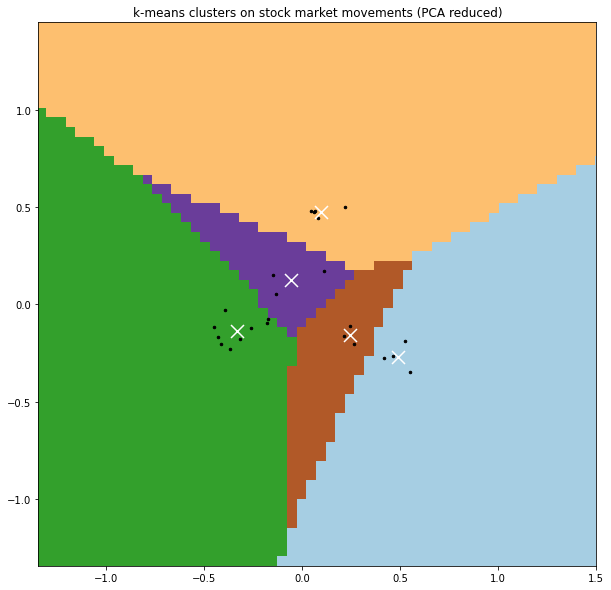

In [0]:
# plotting the decision boundatry

pca = PCA(n_components=2).fit_transform(norm_movements)

# step_size of mesh 
h = 0.05

# plotting decision boundary
x_min, x_max = pca[:,0].min()-1, pca[:,0].max()+1
y_min, y_max = pca[:,1].min()-1, pca[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

# labels for each point in the mesh using the trained model 
pred = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# putting the result into a color plot
pred = pred.reshape(xx.shape)

# color of plot 
cmap = plt.cm.Paired

# plotting
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(pred, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=cmap, aspect='auto', origin='lower')
plt.plot(pca[:,0], pca[:,1], 'k.', markersize=5)

# plotting centroid of each cluster
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=169, linewidths=3, color='w', zorder=10)
plt.title("k-means clusters on stock market movements (PCA reduced)")
plt.xlim(x_min, x_max)
plt.xlim(y_min, y_max)
plt.show()